<a href="https://colab.research.google.com/github/chrisseiler96/DS-Sprint-02-Storytelling-With-Data/blob/master/Copy_of_LS_DS_122_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 21:59:27--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 21:59:27 (156 MB/s) - ‘misleading.py.1’ saved [1641/1641]



#### Fix misleading plot #1

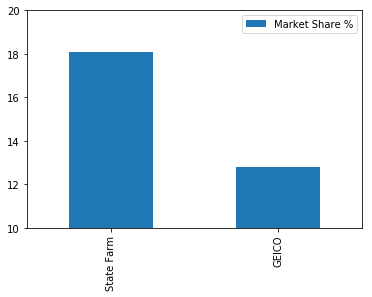

In [5]:
misleading.plot1()

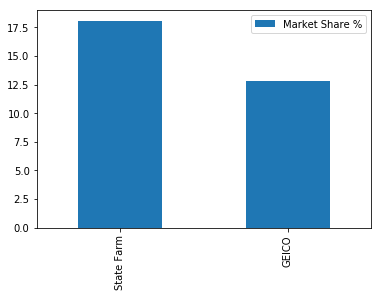

In [6]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})

insurance.plot.bar()

#### Fix misleading plot #2

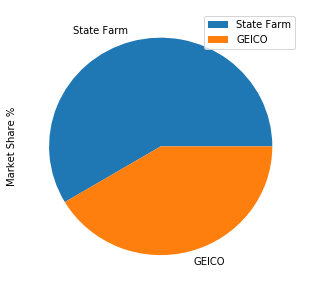

In [7]:
misleading.plot2()

The problem is the numbers don't add up to 100%. 

The pie's categories should be "mutually exclusive, collectively exhaustive."

Fix by adding an "other" category to the dataframe.

In [8]:
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


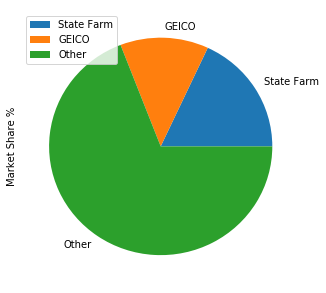

In [9]:
insurance.plot.pie('Market Share %', figsize=(5, 5))

#### Fix misleading plot #3

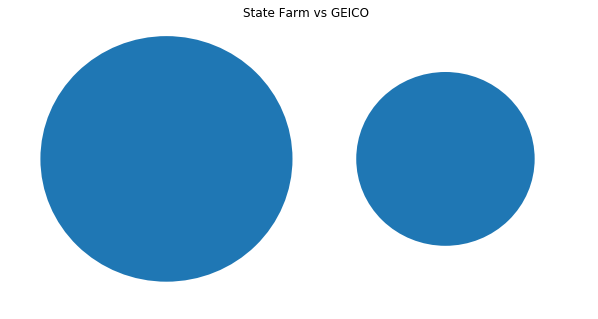

In [10]:
misleading.plot3()

The problem is the circles are sized by radius:
  

```
circle = plt.Circle(... radius=18.07)

circle = plt.Circle(... radius=12.79)
```

But people perceive size differences by area.


The first circle ought to appear 1.4x as big as the second.

In [11]:
18.07 / 12.79

1.4128225175918687

But the first circle actually appears ~2x as big as the second:

In [12]:
from math import pi
(pi*18.07**2) / (pi*12.79**2)

1.9960674662146263

If we set the radii to the square root of the data, then the areas will be correctly proportioned:

In [13]:
from math import sqrt
sqrt(18.07)**2 / sqrt(12.79)**2

1.4128225175918685

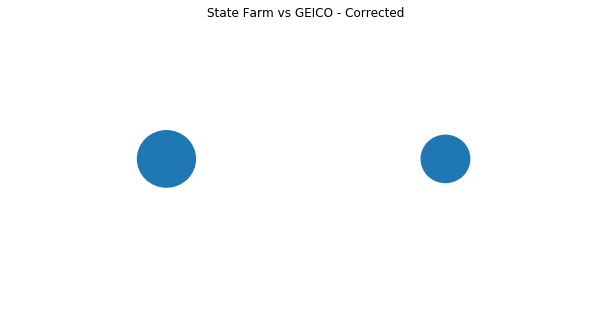

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=sqrt(18.07))
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=sqrt(12.79))
ax.add_artist(circle)

plt.title('State Farm vs GEICO - Corrected')
plt.show()

And we can scale by a constant factor:

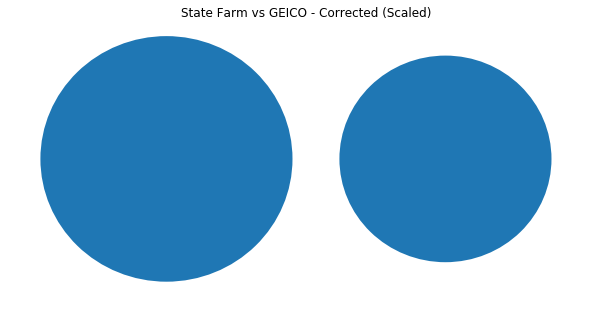

In [15]:
scale = 18.07 / sqrt(18.07)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, 80))
ax.set_ylim((0, 40))
plt.axis('off')

circle = plt.Circle(xy=(20, 20), radius=sqrt(18.07) * scale)
ax.add_artist(circle)

circle = plt.Circle(xy=(60, 20), radius=sqrt(12.79) * scale)
ax.add_artist(circle)

plt.title('State Farm vs GEICO - Corrected (Scaled)')
plt.show()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
 #import altair as alt
 #alt.renderers.enable('notebook')

In [18]:
misleading.plot4()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [19]:
# Based on https://altair-viz.github.io/gallery/choropleth_repeat.html

import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

pop_eng_hur = data.population_engineers_hurricanes.url
variable = 'population'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop_eng_hur, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'population',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data: 'https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv',
      fields: ['population'],
      key: 'id'
    }),
    lookup: 'id'
  })],
  width: 500
})

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [0]:
df.shape

### See the data

In [0]:
df.head()

### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [0]:
groups.describe()

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [0]:
groups.count()

### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [0]:
groups.mean()

### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [0]:
groups.std()

### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [0]:
groups.corr()

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

In [0]:
groups.plot('x','y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

In [0]:
sns.relplot('x','y', col='dataset', data = df, col_wrap = 2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [0]:
sns.lmplot('x','y', col = 'dataset', data = df, col_wrap = 2, hue = 'dataset', ci = None)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [0]:
tips.shape

### See the first 5 rows

In [0]:
tips.head()

### Describe the data

In [0]:
tips.describe()

### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [0]:
sns.distplot(tips.tip)

In [0]:
sns.distplot(tips.total_bill)

In [0]:
tips['percent'] = tips.tip / tips.total_bill

In [0]:
sns.distplot(tips.percent);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

In [0]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5);

In [0]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [0]:
tips.sex.value_counts()

In [0]:
tips.sex.value_counts().plot.bar();

In [0]:
sns.catplot('sex', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [0]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5);

In [0]:
sns.catplot('sex', 'tip', data=tips, kind='box');

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [0]:
flights.shape

### See the first 5 rows

In [0]:
flights.head()

### Describe the data

In [0]:
flights.describe()

### Plot year & passengers

In [0]:
sns.relplot('year','passengers', data=flights, alpha=0.5)

### Plot month & passengers

In [0]:
flights.month.value_counts()

In [0]:
sns.catplot('month', 'passengers', data=flights, kind='strip', alpha=0.9, height= 10, linewidth = 1.5);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [0]:
ptable = pd.pivot_table(flights, values = 'passengers', index = ['month','year'])

In [0]:
ptable

In [0]:
 flights2 = flights.pivot("month", "year", "passengers")


In [0]:
flights2

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [0]:
ax = sns.heatmap(flights2)
